# **Lab 3**

- Eileen Garcia: 48241821
- Trevor  Dohm: 48376059
- Reece Iriye: 48255107

## **0: Imports** 

In [4]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [5]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.1.1
Numpy: 1.23.5


## **1: Business & Data Understanding**

### **1.1: Dataset Overview**

"Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits," according to <a href="https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/">Analytics Vidhya</a>. The purpose of customer segmentation is to target specific groups of a company's consumer base, instead of the consumer base as a whole, to then target smaller and very specific subsets of the entire customer population to send them focused, relevant messages or promotions to then motivate them to buy their products. Customer segmentation can also be important for understanding customer's preferences, so that they then see what a segment finds most valuable then tailor marketing towards them.  

The "Customer Segmentation Classification" dataset, available on <a href="https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation">Kaggle</a>, captures diverse aspects of an automobile company's customer base, detailing their characteristics and behaviors. With approximately 10,000 entries in this dataset, the dataset contains multiple demographic and behavioral attributes like gender, marital status, age, profession, spending score, and more. The feature of interest that would be valuable for predictive purposes for this automobile company is the `Segmentation` column, splitting customers into one of four distinct groups: A, B, C, or D. We have a strong reason to believe that these labels represent the smaller groups of customers potentially identified by a marketing team, where the marketing team has had a strong history of tailoring advertising towards these 4 different groups all in different ways. These segmentation categories dictate the company's their outreach approach and marketing strategies. 

### **1.2: Purpose of Dataset Collection and Usefulness Expectation**

The prime motive behind collecting and structuring the "Customer Segmentation Classification" dataset is to leverage data-driven insights for precise marketing that would bring in much more revenue than just treating every unique consumer the same as each other. In the competitive automobile sector, generic marketing campaigns might not resonate equally with all segments of the automobile company's consumer base. Hence, by collecting this data and building a model out of it to identify the segment of each customer in the consumer base, the automobile company can identify how to approach marketing for each customer based on their characterictics relative to other customers already labeled in segments.

*So, why wouldn't we just let the marketing team continue to manually divide customers into these categories?* Well, the issue here is that this labeling process is expensive. It takes time away from the marketing team that could be better spent on coming up with different ideas to bring in revenue, and it takes money away from the automobile company by making them pay for marketing agents to consistently focus on segmenting its consumer groups. By automating this labeling task with a high-performing model in deployment during varying stages of the market, the automobile company could profit heavily by cutting down their costs. Any lower performance, depending on how much the automobile team is investing in marketing and how much of their revenue stream they would lose due to misclassification (or missegmentation in this context), would likely not be safe to bet on and employ in practice. 

### **1.3: Prediction Task and Stakeholder Interest**

With the collected data from this Kaggle dataset, the impending challenge is to predict which segment that potential or new customers would align with. By putting the existing data into a machine learning model, the company wishes to establish an algorithm that, when fed with demographic and behavioral attributes of a new customer, predicts the segment they likely belong to. Such foresight can drastically reshape the initial approach towards these customers, ensuring they receive personalized experiences right from their first interaction.

Stakeholders, spanning from the sales team, marketing strategists, to product developers, stand to gain immensely from these predictions. Sales teams can approach potential customers with tailor-made pitches, marketing teams can sculpt campaigns that resonate with specific segments that have been identified already far in advance, and product developers can understand the nuanced needs and expectations of each segment, ensuring the products are continually refined to meet or exceed these expectations.

### **1.4: Algorithm Performance Expectation for Profitability and Business Efficacy**

In a business landscape where personalization is essential, the margin for error in customer segmentation is small. So, for a segmentation model to meet and exceed its business utility, it needs to be extremely accurate. Aiming for a consistent accuracy rate of at least 90% during its deployment phase would be a strong profitibility benchmark to keep for the stakeholders at this automobile company to have strong confidence in the model's performance. Anything below this threshold might risk the misclassification of customers into inappropriate segments, potentially leading to wasted marketing efforts or even the risk of alienating the customer. Ideally, the algorithm should consistently outperform generic outreach strategies in terms of engagement and conversion rates.

Furthermore, beyond just accuracy, the model's adaptability to evolving markets and its scalability are crucial. It should be capable of handling new data, changes in customer behaviors, or shifts in market trends. In essence, the performance should not only be assessed in terms of its current accuracy but also its potential longevity and adaptability in a dynamic market. A high-performing segmentation model, maintaining or exceeding the 90% accuracy rate, could potentially translate to increased sales, heightened brand loyalty, and an enhanced reputation for the company in the automobile sector.

## **2: Data Exploration**

### **2.1: Loading Data In and Seeing Basic Characteristcs**

In [6]:
df_train_csv: pd.DataFrame = pd.read_csv("Dataset/Train.csv")
df_test_csv: pd.DataFrame = pd.read_csv("Dataset/Test.csv")

df_train_csv.info()
df_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

Our data comes prepackages in training and testing datasets, but we wanted to ensure that these datasets were consolidated into one set so that we can apply a `train_test_split()` operation to randomly generate our own training and testing data split later. By merging the two sets, we have a richer, more comprehensive dataset at our disposal. This gives us a larger pool of data to both train our models and to evaluate their performance.

In [43]:
# Concatenate the train and test datasets
df_original = pd.concat([df_train_csv, df_test_csv], axis=0)

# Summarize Dataset Scheme
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [44]:
# Dataset Size
row_count, col_count = df_original.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 10695 rows and 11 columns.


In [45]:
# Check for Duplicate Behavior
print(f"The ID attribute in the original dataset has {df_original['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the original dataset has 8363 unique values, and there are 10695 rows in total in the dataset.


In [46]:
# Interestingly, there are no duplicates in each dataset on their own
row_count, col_count = df_test_csv.shape
print(f"The ID attribute in the test dataset has {df_test_csv['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

row_count, col_count = df_train_csv.shape
print(f"The ID attribute in the training dataset has {df_train_csv['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the test dataset has 2627 unique values, and there are 2627 rows in total in the dataset.
The ID attribute in the training dataset has 8068 unique values, and there are 8068 rows in total in the dataset.


### **2.2: Checking for Duplicate ID's**

In [47]:
# Check to see if they are actually duplicates
# Find duplicate IDs (these IDs are supposed to be unique)
duplicate_ids = df_original[df_original['ID'].duplicated(keep=False)]

# Sort the DataFrame by the 'ID' column to maintain the original order
sorted_duplicate_ids = duplicate_ids.sort_values(by='ID')

# Print some of the duplicate rows
print(sorted_duplicate_ids)

# TODO: Why are the numerics differing when the ID and categorical columns are the same???

          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
4977  458989  Female          Yes   42       Yes    Engineer              1.0   
0     458989  Female          Yes   36       Yes    Engineer              0.0   
6060  458994    Male          Yes   38       Yes  Healthcare              8.0   
1     458994    Male          Yes   37       Yes  Healthcare              8.0   
7523  458996  Female          Yes   71        No         NaN              1.0   
...      ...     ...          ...  ...       ...         ...              ...   
2622  467954    Male           No   29        No  Healthcare              9.0   
5499  467958  Female           No   43       Yes      Doctor              0.0   
2623  467958  Female           No   35       Yes      Doctor              1.0   
7172  467961    Male          Yes   45       Yes   Executive              1.0   
2625  467961    Male          Yes   47       Yes   Executive              1.0   

     Spending_Score  Family

In [48]:
# Check if the rows are exactly the same across all columns (not just ID)
duplicate_rows = df_original[df_original.duplicated(keep=False, subset=df_original.columns)]

# See if duplicate_rows is empty (aka no duplicate rows)
if duplicate_rows.empty:
    print("No duplicate rows found.")
else: 
    duplicate_rows_sorted = duplicate_rows.sort_values(by='ID')
    print("Duplicate rows found:")
    print(duplicate_rows_sorted)

Duplicate rows found:
          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
78    459223  Female          Yes   47       Yes      Doctor              1.0   
4562  459223  Female          Yes   47       Yes      Doctor              1.0   
104   459320    Male          Yes   26       Yes   Executive              0.0   
4916  459320    Male          Yes   26       Yes   Executive              0.0   
246   459763    Male           No   18        No      Artist              NaN   
...      ...     ...          ...  ...       ...         ...              ...   
193   467539    Male          Yes   48       Yes      Artist              NaN   
2506  467569    Male           No   19        No  Healthcare              NaN   
7865  467569    Male           No   19        No  Healthcare              NaN   
4745  467892    Male           No   23        No      Doctor              1.0   
2599  467892    Male           No   23        No      Doctor              1.0   

     

Conclusion: After concatenating the test and train data, we see 2332 IDs that were duplicated (AKA 4664 rows). However, looking at the test and train data frames separately, neither have duplicate IDs within themselves. We can conclude that some of the duplicates come from IDs being reused between the test and train data frames.

We also checked for completely identical rows, not just across ID, but across all columns. We found 76 rows that fit the description, meaning there are 38 instances that are exact duplicates.

### **2.3: Exploring Missing Data**

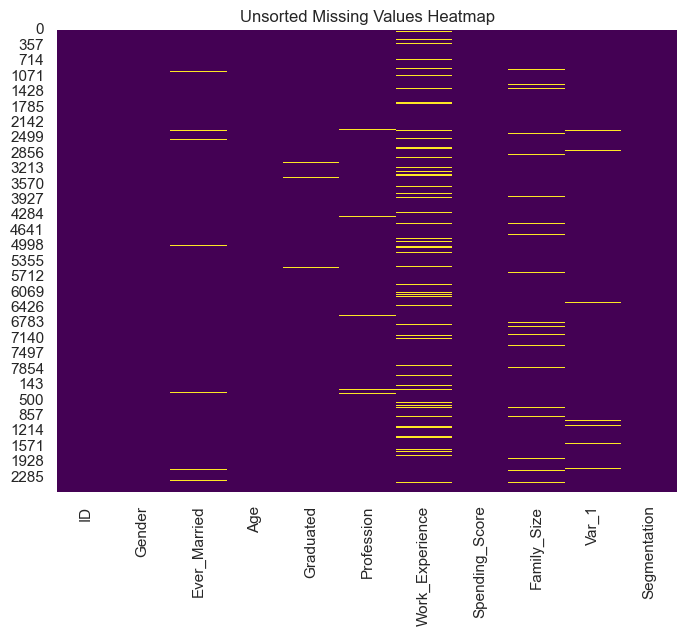

In [49]:
# Exploring Missing Data - ChatGPT 
# Create a boolean DataFrame where True indicates missing values

missing_values = df_original.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Unsorted Missing Values Heatmap')
plt.show()

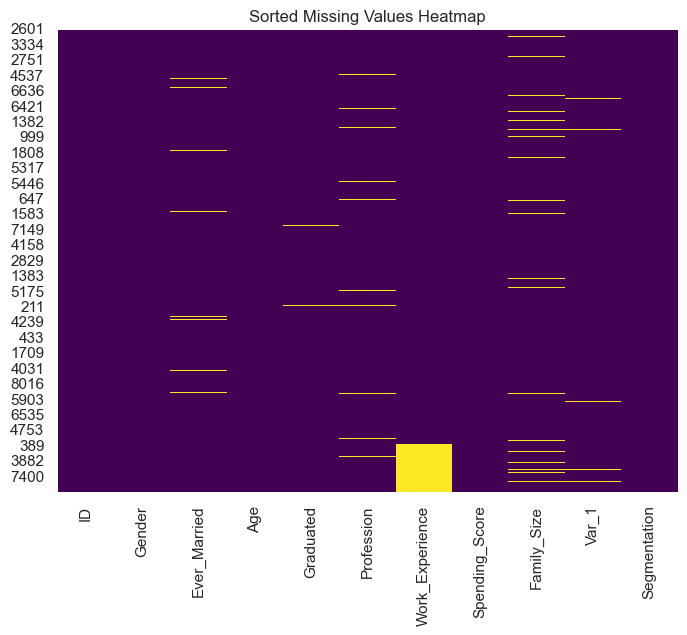

In [50]:
# Sorted by Work Experience
df_sorted_for_nan_transparency = df_original.sort_values(by="Work_Experience")

missing_values_post_sort = df_sorted_for_nan_transparency.isnull()


plt.figure(figsize=(8,6))
sns.heatmap(missing_values_post_sort, cmap='viridis', cbar=False)
plt.title('Sorted Missing Values Heatmap')
plt.show()

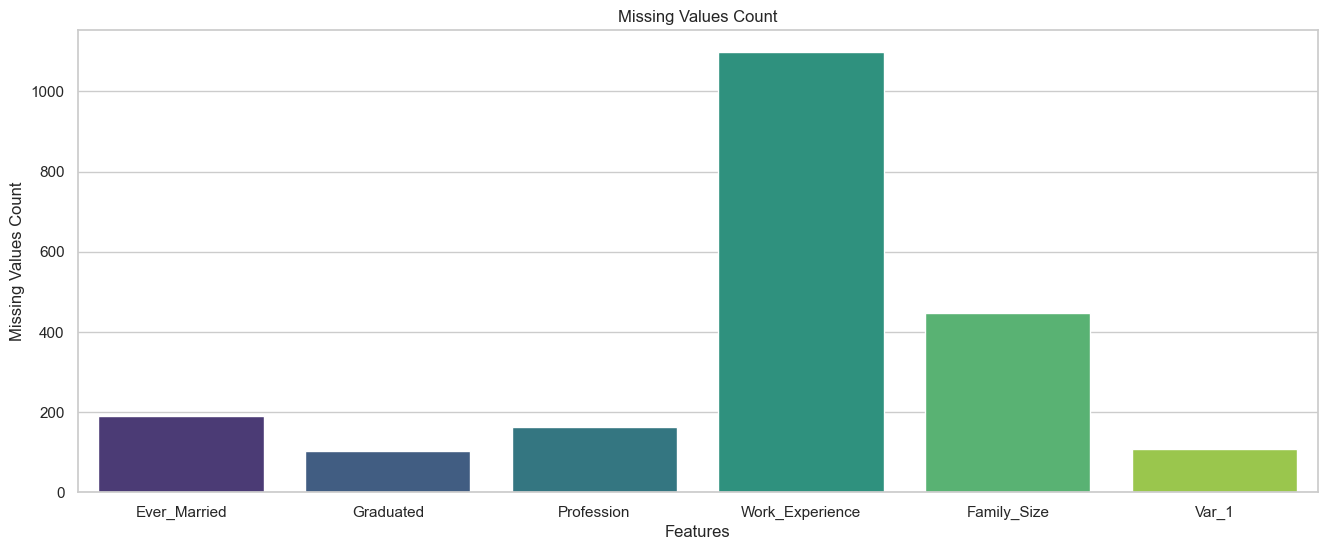

In [51]:
# Bar Plot of missing Values

# Find Missing Values (Sort)
missCount = df_original.isnull().sum()[df_original.isnull().sum() > 0]
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCount.index, y = missCount.values, palette = "viridis")
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [52]:
# Given the above, we might be tempted to discard Work_Experience
# Leaving it for now, because it kind of shows how long 
# the customer has been commuting to work

In [53]:
# Deleting Unnecessary Columns 
# Var_1 is an "Anonymised Category for the customer"
# ID is not going to help us classify customers
# Get rid of them!!!!
df_modified = df_original

for col in ['Var_1', 'ID']:
    if col in df_modified:
        del df_modified[col]
        
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 835.5+ KB


### **2.4: Imputation for Missing Values**

When examining this 10,695-entry data, we see a few compelling reasons to advocate for the use of imputation over outright elimination of rows where NaN's exist. First off, data retention is a major issue here, especially since ~10,000 rows is not a lot of data in the context of customer segmentation, and we need as much data as possible to get as close to accurate as we possibly can. By removing rows with NaN values, there's the danger of discarding a considerable chunk of the dataset, and with it, potentially valuable insights that lie in the non-missing cells. Removing the `Work_Experience` column is extremely risky too, because it might be indispensable to the analysis, and the integrity of our model could easily be diminished by removing it. Furthermore, for categorical columns like `Ever_Married` or `Profession`, the mode — or the most frequently occurring value — serves as a logical placeholder for missing entries. The mean imputation makes more sense in the context of quantitative variables in our dataset, because we then place a value that strongly represents an average in our dataset and still keep the columns as extremely important values to retain for customers who have abnormal values in comparison to the distribution in each of these columns.

Even though we prefer it in this context, the mode and mean imputation approach also has its pitfalls. While it may tackle certain biases by retaining the original dataset's volume (especially since we don't have a lot of data in the first place), it simultaneously runs the risk of introducing new biases. Over-representing a category with means and modes might inadvertently skew the results in its favor. While mode and mean imputation offers a practical avenue for dealing with NaNs that emerge in our dataset, we should be cautious, as there really isn't an ideal way to deal with the NaN values that we are seeing. We just want to make sure we're maximizing the practical use out of the dataset that we have. 

In [54]:
# Impute missing values -> ChatGPT
# For categorical types, lets impute with the mode.
df_modified['Profession'].fillna(df_modified['Profession'].mode()[0], inplace=True)
df_modified['Ever_Married'].fillna(df_modified['Ever_Married'].mode()[0], inplace=True)
df_modified['Graduated'].fillna(df_modified['Graduated'].mode()[0], inplace=True)

# For numeric types, lets impute with the mean.
df_modified['Work_Experience'].fillna(df_modified['Work_Experience'].mean(), inplace=True)
df_modified['Family_Size'].fillna(df_modified['Family_Size'].mean(), inplace=True)

# Verify there are no more null values
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  10695 non-null  float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10695 non-null  float64
 8   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 835.5+ KB


### **2.5: One-Hot-Encoding for Categorical Variables**

In [55]:
# Convert 'Segmentation' column values from A, B, C, D to 0, 1, 2, 3
segment_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df_modified['Segmentation'] = df_modified['Segmentation'].replace(segment_mapping)

In [56]:
# One hot encode the categorical variables

# Gender (Male, Female)
# Ever_Married (No, Yes)
# Graduated (No, Yes)
# Profession (['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
# 'Doctor' 'Homemaker' 'Marketing'])
# Spending_Score (Low, Average, High)

# We must keep track of our target variable 'Segmentation'. 
# Separate it before one-hot encoding and then re-add it to the dataframe afterward.
target = df_modified['Segmentation']
df_modified.drop('Segmentation', axis=1, inplace=True)

df_one_hot_encoded = pd.get_dummies(df_modified, drop_first=False)
df_one_hot_encoded_int = df_one_hot_encoded.select_dtypes(include='bool').astype(int)

df_one_hot_encoded.update(df_one_hot_encoded_int)

df_one_hot_encoded['Segmentation'] = target

print(df_one_hot_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10695 non-null  int64  
 1   Work_Experience           10695 non-null  float64
 2   Family_Size               10695 non-null  float64
 3   Gender_Female             10695 non-null  int32  
 4   Gender_Male               10695 non-null  int32  
 5   Ever_Married_No           10695 non-null  int32  
 6   Ever_Married_Yes          10695 non-null  int32  
 7   Graduated_No              10695 non-null  int32  
 8   Graduated_Yes             10695 non-null  int32  
 9   Profession_Artist         10695 non-null  int32  
 10  Profession_Doctor         10695 non-null  int32  
 11  Profession_Engineer       10695 non-null  int32  
 12  Profession_Entertainment  10695 non-null  int32  
 13  Profession_Executive      10695 non-null  int32  
 14  Profession_H

In [57]:
# 1 = True, 0 = False
print(df_one_hot_encoded) 

      Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0      22         1.000000          4.0              0            1   
1      38         2.619777          3.0              1            0   
2      67         1.000000          1.0              1            0   
3      67         0.000000          2.0              0            1   
4      40         2.619777          6.0              1            0   
...   ...              ...          ...            ...          ...   
2622   29         9.000000          4.0              0            1   
2623   35         1.000000          1.0              1            0   
2624   53         2.619777          2.0              1            0   
2625   47         1.000000          5.0              0            1   
2626   43         9.000000          3.0              1            0   

      Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0                   1                 0             1              0   
1  

### **2.6: Standard Scaling for Values**

Standard scaling is a fundamental preprocessing step employed in machine learning tasks. The technique involves normalizing the features of the dataset so that they have a mean of 0 and a standard deviation of 1. We are choosing to employ standard scaling into this model, because 

In [58]:
# Feature Scaling (Standard Scalar)
stdscaler = StandardScaler()

# We'll scale only the features, not the target variable.
X = df_one_hot_encoded.drop('Segmentation', axis=1)
df_scaled = stdscaler.fit_transform(X)
y = df_one_hot_encoded['Segmentation']

### **2.7: Breakdown of Variables (Post Pre-Processing)**

In [59]:
# Provide mean, std, etc. for all variables (Summary Statistics) -> ChatGPT
# Convert the NumPy ndarray to a pandas DataFrame
df_converted = pd.DataFrame(df_scaled)

# Use pandas to compute and print summary statistics
summary_stats = df_converted.describe()

print("Summary Statistics:")
print(summary_stats)

# Note: Only columns 0, 1, and 2 (Age, Work_Experience, Family_Size)
# Are numeric. Columns 3 - 24 are categorical and have
# been one hot encoded.

Summary Statistics:
                 0             1             2             3             4   \
count  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04   
mean  -1.710750e-16  2.823569e-17 -6.776565e-17  8.670017e-17 -8.670017e-17   
std    1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00   
min   -1.520972e+00 -8.156593e-01 -1.226237e+00 -9.116041e-01 -1.096967e+00   
25%   -8.055522e-01 -8.156593e-01 -5.612681e-01 -9.116041e-01 -1.096967e+00   
50%   -1.497509e-01 -5.043124e-01  0.000000e+00 -9.116041e-01  9.116041e-01   
75%    5.656687e-01  1.183812e-01  7.686693e-01  1.096967e+00  9.116041e-01   
max    2.711927e+00  3.543196e+00  4.093513e+00  1.096967e+00  9.116041e-01   

                 5             6             7             8             9   \
count  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04   
mean   2.657476e-18  6.909438e-17  7.507371e-17 -7.507371e-17  2.125981e-17   
std    1.000047e+00  1.000047e+

### **2.8: Training and Testing Split Argument**

In [60]:
# Divide the data into training and testing splits
# Use an 80% training and 20% testing split
from sklearn.model_selection import train_test_split

# Including seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.2, random_state=38)

# X_train and y_train contain 80%, X_test and y_test contain the remaining 20%
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8556, 21), (8556,), (2139, 21), (2139,))

We will incorporate an 80/20 train-test split using scikit-learn. One reason for this is that we want to gauge the model's performance on unseen, fresh data that the model has not been trained on. By dividing the dataset into an 80% training and 20% testing split, we can  train our model on a substantial majority of the data, while reserving a fifth of it to act as a test for our model's predictions, simulating its real-world application on fresh customer data. This is especially important, because a version of this model that generates revenue for the automobile company where the dataset came from requires that the model is deployed for existing, new, and future customers for customer segmentation.

An 80/20 split typically means we have a sizable amount of data for model training, while still retaining a significant portion to validate its predictions, thereby providing a balanced approach. We have around 10,000 rows of data, so in the case of an 80/20 split, we would have a sizeable amount of data for both the training process and the validation process. It's a strategic move against overfitting, where we could get false confidence in our model before deployment. The 20% test split serves as a buffer, highlighting if the model is generalizing well or merely is just memorizing patterns. If we did not have nearly as much access to this amount of data, we would probably use all of the data for the training process, solely because we would need to take advantage of all our data we have at our disposal, but the amount of data here suggests for me that we have a sufficient amount of data.

## **3: Modeling**

### **3.1: Combined Class Logistic Regression**

In [22]:
# =================
# Import Statements
# =================

# Standard Stuff
import numpy as np
from numpy import ma # (Masked Array): Has NumPy Functions That Work With NaN Data
from numpy.linalg import pinv # Moore-Penrose Pseudoinverse
import math

# Sklearn Imports 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import fmin_bfgs, minimize_scalar # BFGS Algorithm: Extremely Common Optimization Algorithm

# ==================================
# MultiClassLogisticRegression Class
# ==================================

class MultiClassLogisticRegression:


    def __init__(self, eta: float, iterations: int = 10, C: float = 0.1, 
                 solver: str = "quasi", penalty: str = "l2", line_iters: float = 0.0) -> None:
        """
        Initialize the MultiClassLogisticRegression.

        Parameters
        ----------
        eta : float
            Learning rate.
        iterations : int, optional
            Number of iterations, by default 10.
        C : float, optional
            Regularization strength, by default 0.1.
        solver : str, optional
            Optimization algorithm - options: ('steepest', 'stochastic', 'newton', 'quasi'), 
            by default 'quasi'.
        penalty : str, optional
            Regularization penalty type - options: ('none', 'l1', 'l2', 'both'), by default 'l2'.
        line_iters : float, optional
            Number of iterations for line search (if applicable), by default 0.0.

        Returns
        -------
        None
        """
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.penalty = penalty
        self.line_iters = line_iters
        self.classifiers_ = []

    # Return Trained Status (String)
    def __str__(self) -> str:
        if hasattr(self, 'w_'):
            return 'MultiClass Logistic Regression Object With Coefficients:\n' + str(self.w_)
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    # ==============================
    # Convenience Methods (Private):
    # ==============================

    @staticmethod
    def _add_bias(X):

        # Add Bias Term
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    @staticmethod
    def _sigmoid(theta):

        # Increase Stability, Redefine Sigmoid Operation (1 / (1 + np.exp(-theta)))
        return expit(theta)
    
    # Defines Function With First Input To Be Optimized (Eta)
    @staticmethod
    def _objective_function_steepest(eta, X, y, w, grad, C, penalty):
        wnew = w + grad * eta
        g = expit(X @ wnew)

        # Regularization
        regularization = 0
        if penalty == "l1":
            regularization = C * np.sum(np.abs(wnew))
        elif penalty == "l2":
            regularization = C * np.sum(wnew**2)
        elif penalty == "both":
            regularization = C * (np.sum(np.abs(wnew)) + np.sum(wnew**2))

        # Use Normal Log Likelihood For Maximization (Negative Would Be Minimization)
        return np.sum(ma.log(g[y == 1])) + ma.sum(np.log(1 - g[y == 0])) - regularization
    
    @staticmethod
    def _objective_function_bfgs(w, X, y, C, penalty):
        g = expit(X @ w)
        
        # Regularization
        regularization = 0
        if penalty == "l1":
            regularization = C * np.sum(np.abs(w))
        elif penalty == "l2":
            regularization = C * np.sum(w**2)
        elif penalty == "both":
            regularization = C * (np.sum(np.abs(w)) + np.sum(w**2))
        
        return -np.sum(ma.log(g[y == 1])) - np.sum(ma.log(1 - g[y == 0])) + regularization

    @staticmethod
    def _objective_gradient_bfgs(w, X, y, C, penalty):
        g = expit(X @ w)
        ydiff = y - g
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        
        # Regularization
        gradient = gradient.reshape(w.shape)
        if penalty == "l1":
            gradient[1:] += -C * np.sign(w[1:])
        elif penalty == "l2":
            gradient[1:] += -2 * C * w[1:]
        elif penalty == "both":
            gradient[1:] += -C * (np.sign(w[1:]) + 2 * w[1:])
        
        return -gradient

    # ============================
    # Binary Probability Functions
    # ============================

    def _predict_proba_binary(self, X, w, add_bias = True):

        # Add Bias Term If Requested
        Xb = self._add_bias(X) if add_bias else X

        # Return Probability Of Class 1
        return self._sigmoid(Xb @ w)
    
    
    def _predict_binary(self, X):

        # Return Actual Prediction
        return (self._predict_proba_binary(X, self.w_) > 0.5)
    
    # ==================
    # Gradient Functions
    # ==================

    # Vectorized Gradient Calculation With Chosen Regularization
    def _get_gradient(self, X, y):

        # Get Difference, Make Column Vector And Multiply Through
        ydiff = y - self._predict_proba_binary(X, self.w_, add_bias = False).ravel()
        gradient = np.mean(X * ydiff[:, np.newaxis], axis = 0)
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return gradient
    
    # Stochastic Gradient Calculation
    def _get_gradient_stochastic(self, X, y):

        # Grab Random Instance, Get Difference, Make Column Vector And Multiply Through
        # np.random.seed(0) # For Debugging
        idx = int(np.random.rand() * len(y))
        ydiff = y[idx] - self._predict_proba_binary(X[idx], self.w_, add_bias = False) 
        gradient = X[idx] * ydiff[:, np.newaxis]
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return gradient
    
    # Newton's Method Gradient Calculation
    def _get_gradient_newton(self, X, y):

        # Get Sigmoid Value For All Classes, Calculate Hessian
        # Get Difference, Make Column Vector And Multiply Through
        g = self._predict_proba_binary(X, self.w_, add_bias = False).ravel()
        hessian = X.T @ np.diag(g * (1 - g)) @ X - 2 * self.C
        ydiff = y - g
        gradient = np.sum(X * ydiff[:, np.newaxis], axis = 0)
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return pinv(hessian) @ gradient
    
    # ==============
    # Fit Functions
    # ==============

    def _fit_binary(self, X, y):

        # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        # Initialize Weight Vectors To Zeros
        self.w_ = np.zeros((num_features, 1))
        
        # For Each Iteration (As Many As Max Iterations)
        for _ in range(self.iters):
            
            # Depending On Solver, Change Gradient Calculation
            if self.solver == "stochastic":
                # print("Stochastic Gradient Ascent Method")
                gradient = self._get_gradient_stochastic(Xb, y)
            elif self.solver == "newton":
                # print("Newton Method")
                gradient = self._get_gradient_newton(Xb, y)
            else:
                gradient = self._get_gradient(Xb, y)

            # Multiply By Learning Rate, Add B/C Maximizing
            self.w_ += gradient * self.eta


    def _fit_steepest(self, X, y):

        # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        # Initialize Weight Vectors To Zeros
        self.w_ = np.zeros((num_features, 1))
        
        # For Each Iteration (As Many As Max Iterations)
        for _ in range(self.iters):

            # Get Gradient (Use Base Solver Since Steepest) - Positive For Maximization
            gradient = self._get_gradient(Xb, y)
            
            # Do Line Search In Gradient Direction, Using Scipy Function
            opts = {'maxiter' : self.line_iters}

            # Minimize Scalar Function (Line Search)
            res = minimize_scalar(self._objective_function_steepest,                                # Objective Function To Optimize
                                  bounds = (0, self.eta * 10),                                      # Bounds To Optimize Over
                                  args = (Xb, y, self.w_, gradient, self.C, self.penalty),          # Additional Argument For Objective Function
                                  method = 'bounded',                                               # Bounded Optimization For Speed
                                  options = opts)                                                   # Set Maximum Iterations
            
            # Get Optimal Learning Rate, Set New Function Values, Subtract To Minimize
            eta = res.x
            self.w_ += gradient * eta


    def _fit_bfgs(self, X, y):

        # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self._objective_function_bfgs,                      # What To Optimize
                            np.zeros((num_features, 1)),                        # Starting Point
                            fprime = self._objective_gradient_bfgs,             # Gradient Function
                            args = (Xb, y, self.C, self.penalty),               # Extra Arguments For Gradient, Objective Function
                            gtol = 1e-03,                                       # Stopping Criteria For Gradient
                            maxiter = self.iters,                               # Stopping Criteria Iterations
                            disp = False)
        
        self.w_ = self.w_.reshape((num_features, 1))
    
    # =================
    # Public Functions:
    # =================
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class probabilities for samples in X.

        Parameters
        ----------
        X : np.ndarray
            Input data.

        Returns
        -------
        np.ndarray
            Class probabilities.
        """

        # Initialize Probabilities
        probs = []

        # Get Probability For Each Classifier
        for w in self.classifiers_:
            probs.append(self._predict_proba_binary(X, w).reshape((len(X), 1)))

        # Make Into Single Matrix
        return np.hstack(probs)
    

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class labels for samples in X.

        Parameters
        ----------
        X : np.ndarray
            Input data.

        Returns
        -------
        np.ndarray
            Predicted class labels.
        """

        # Take Argmax Along Row
        return np.argmax(self.predict_proba(X), axis=1)


    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the model to training data.

        Parameters
        ----------
        X : np.ndarray
            Training data.
        y : np.ndarray
            Target values.

        Returns
        -------
        None
        """

        # Store Unique Classes
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y))
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []

        # For Each Unique Value
        for i, yval in enumerate(self.unique_):

            # Create Binary Problem
            y_binary = np.array(y == yval).astype(int)
            
            # Train Binary Classifier For Class
            if self.solver == "steepest":
                # print("Steepest Ascent Method")
                self._fit_steepest(X, y_binary)
            elif self.solver == "quasi":
                # print("Quasi-Newton Method")
                self._fit_bfgs(X, y_binary)
            else:
                self._fit_binary(X, y_binary)

            # Add Trained Classifier To List
            self.classifiers_.append(self.w_)
            
        # Save All Weights Into One Matrix, Separate Column For Each Class
        self.w_ = np.hstack([w for w in self.classifiers_]).T

# Check Class Help
help(MultiClassLogisticRegression)

Help on class MultiClassLogisticRegression in module __main__:

class MultiClassLogisticRegression(builtins.object)
 |  MultiClassLogisticRegression(eta: float, iterations: int = 10, C: float = 0.1, solver: str = 'quasi', penalty: str = 'l2', line_iters: float = 0.0) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eta: float, iterations: int = 10, C: float = 0.1, solver: str = 'quasi', penalty: str = 'l2', line_iters: float = 0.0) -> None
 |      Initialize the MultiClassLogisticRegression.
 |      
 |      Parameters
 |      ----------
 |      eta : float
 |          Learning rate.
 |      iterations : int, optional
 |          Number of iterations, by default 10.
 |      C : float, optional
 |          Regularization strength, by default 0.1.
 |      solver : str, optional
 |          Optimization algorithm - options: ('steepest', 'stochastic', 'newton', 'quasi'), 
 |          by default 'quasi'.
 |      penalty : str, optional
 |          Regularization penalty type -

In logistic regression, the bias term, often referred to as the intercept, is typically excluded from regularization. This exclusion is deliberate: regularizing the bias would imply penalizing a column with constant values, which can hinder the model's ability to adjust its decision boundary independently of the feature values. In essence, regularizing the bias might negate the very purpose of having a constant term, which is to adjust the decision boundary without the influence of any specific feature.

The regularization strength in logistic regression is represented as `C` in `scikit-learn`. Contrary to intuition, a larger `C` denotes weaker regularization. This inverse relationship is important to remember when tuning the model.

For stability in logistic regression, we employ the `expit` function from `SciPy` to implement the sigmoid function. While the `expit` function is crafted to handle potential computational issues better than a manually coded sigmoid function using NumPy, it's not immune to stability problems. Encountering NaN or Inf values can still signal instability. To mitigate such issues, we employ regularization, which helps ensure stability during optimization.

Regularization's effectiveness can be compromised if features operate on disparate scales. If features aren't scaled uniformly, regularization might penalize some more than others due to their magnitude. To ensure that the regularization effect is consistent across features, it's beneficial to scale them to a comparable range. While there are various scaling methods, I often employ the `StandardScaler` from scikit-learn. It's crucial, however, to remember to scale only the features, leaving the target variable untouched.

For optimization in our `MultiClassLogisticRegression` class, we've chosen the BFGS method. While BFGS is robust, its performance can sometimes be sensitive to its hyperparameters, like `gtol` and `maxiter`. If the optimization exhibits erratic behavior or fails to converge, tweaking these parameters can help. Achieving the right balance in these settings is pivotal for the effective and reliable performance of our logistic regression model.

### **3.2: Generalization Performance Training**

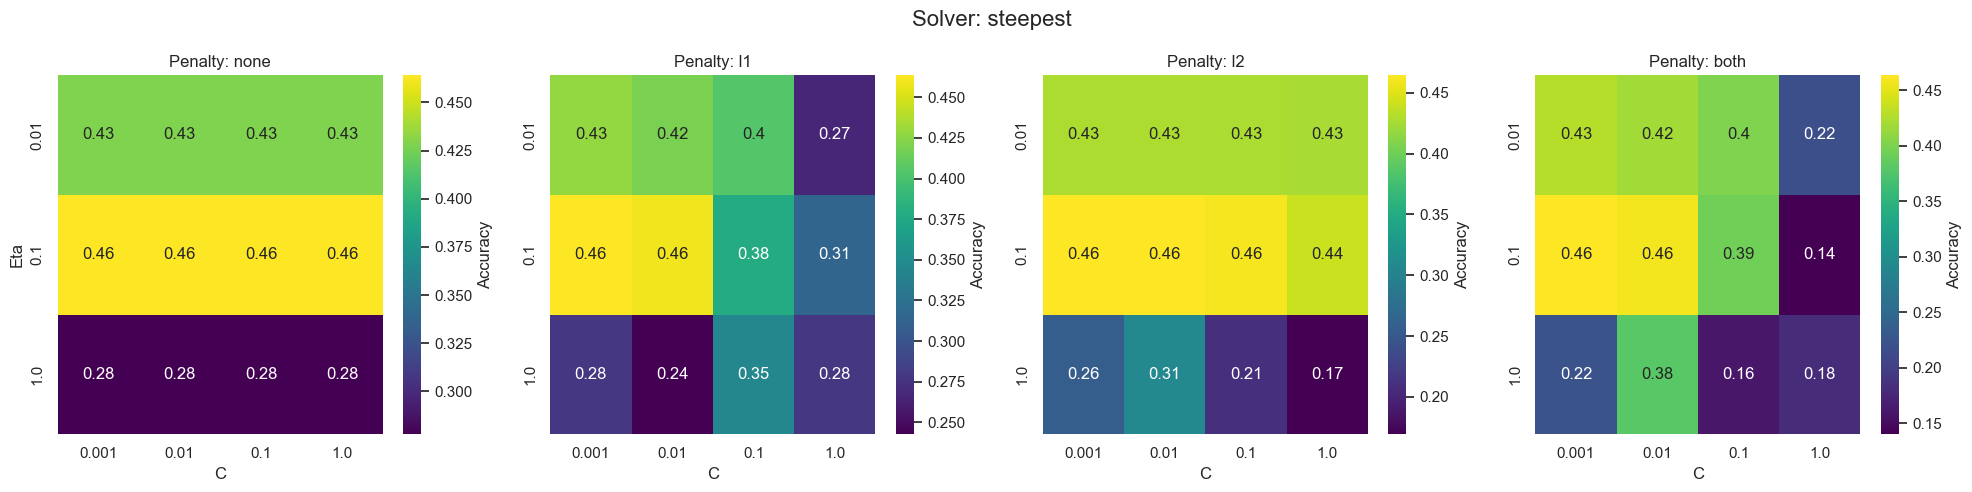

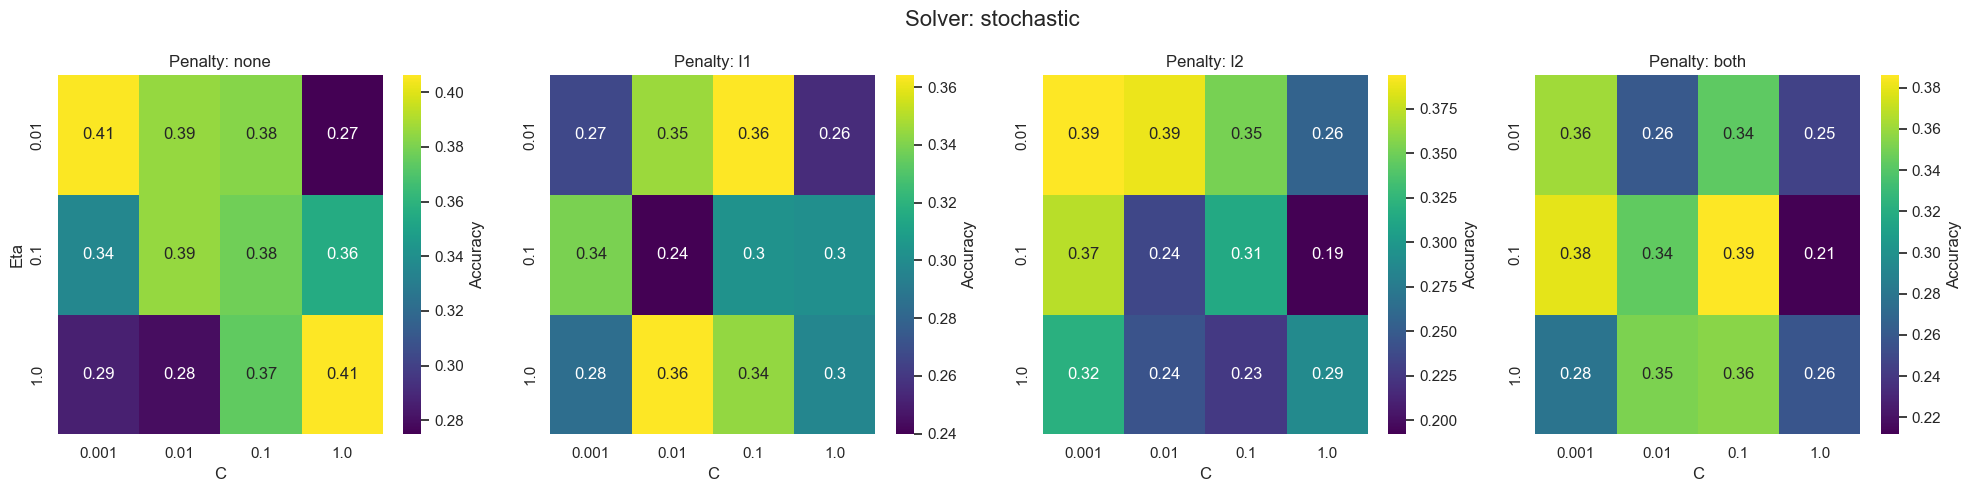

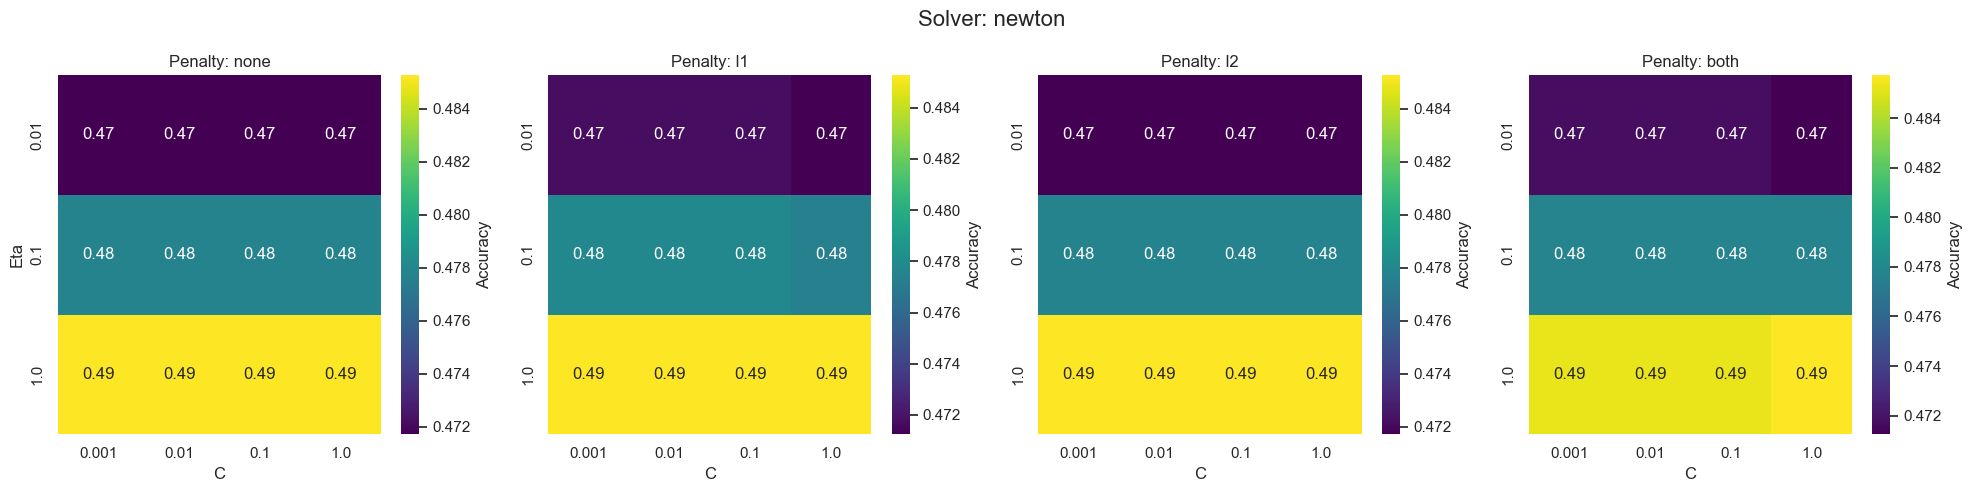

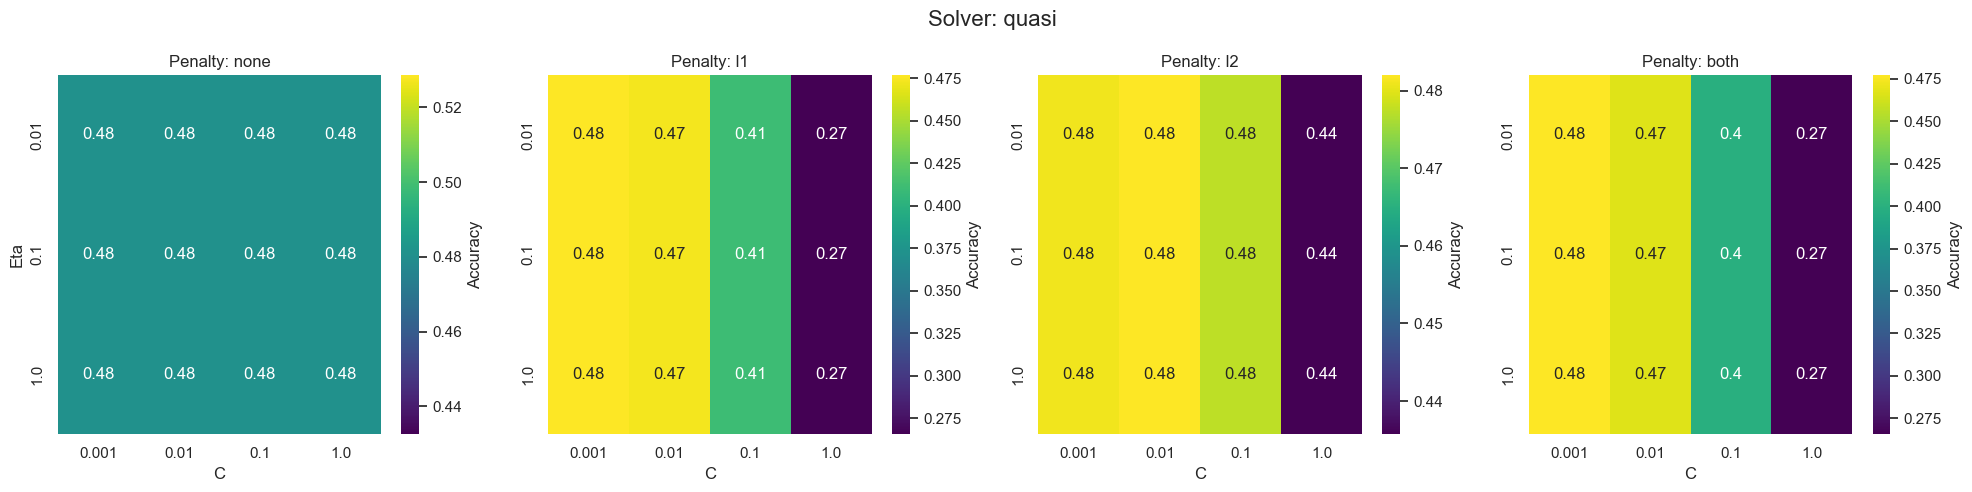

In [64]:
# Import Statements
from ipywidgets import widgets as wd
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define Parameter Grid
etas = [0.01, 0.1, 1.0]
Cs = [0.001, 0.01, 0.1, 1.0]
solvers = ['steepest', 'stochastic', 'newton', 'quasi']
penalties = ['none', 'l1', 'l2', 'both']

# Initialize Results
results = {}

# For Each Parameter Combination
for eta in etas:
    for C in Cs:
        for solver in solvers:
            for penalty in penalties:
                accuracies = []

                # Perform Logistic Regression With Each Combination
                lr = MultiClassLogisticRegression(eta = eta, C = C, solver = solver, penalty = penalty)
                lr.fit(X_train, y_train)
                y_pred = lr.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                
                # Store Results In Dictionary
                if solver not in results:
                    results[solver] = {}
                if penalty not in results[solver]:
                    results[solver][penalty] = {}
                if eta not in results[solver][penalty]:
                    results[solver][penalty][eta] = {}
                results[solver][penalty][eta][C] = accuracy

# Plot Multiple Heatmaps Grouped By Solver
for solver_idx, solver in enumerate(solvers):
    fig, axes = plt.subplots(1, 4, figsize = (20, 5))
    fig.suptitle(f'Solver: {solver}', fontsize = 16)
    
    # PLot Subplot For Each Penalty Type
    for penalty_idx, penalty in enumerate(penalties):
        df_results = pd.DataFrame(results[solver][penalty]).T
        sns.heatmap(df_results, annot = True, cmap = 'viridis', cbar_kws = {'label': 'Accuracy'}, ax = axes[penalty_idx])
        axes[penalty_idx].set_title(f'Penalty: {penalty}')
        axes[penalty_idx].set_xlabel('C')
        if penalty_idx == 0:
            axes[penalty_idx].set_ylabel('Eta')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.85)
    plt.show()

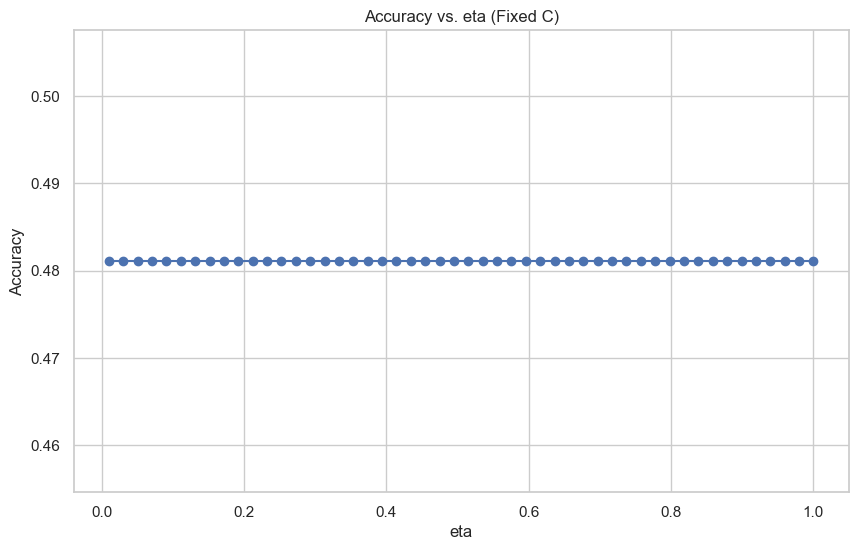

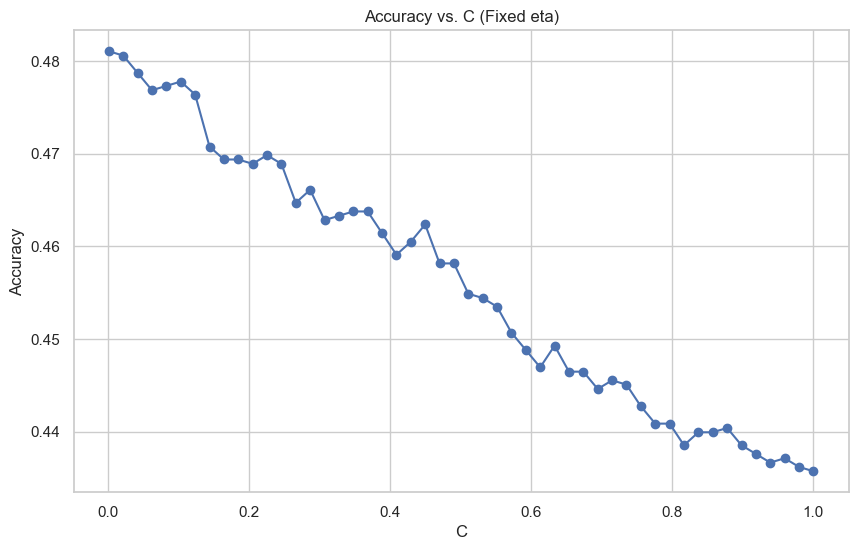

In [65]:
# Define Parameter Grid
etas = np.linspace(0.01, 1.0, 50)  # Linspace Of Eta Values
Cs = np.linspace(0.001, 1.0, 50)   # Linspace Of C Values

# Initialize Lists To Store Results
accuracies_eta_fixed = []
accuracies_C_fixed = []

# Vary Eta, Keep C Constant
for eta in etas:
    lr = MultiClassLogisticRegression(eta = eta, C = 0.001, solver = 'quasi', penalty = 'l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_eta_fixed.append(accuracy)

# Vary C, Keep Eta Constant
for C in Cs:
    lr = MultiClassLogisticRegression(eta = 0.1, C = C, solver = 'quasi', penalty = 'l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_C_fixed.append(accuracy)

# Plot Line Graph For Varying Eta With Fixed C
plt.figure(figsize=(10, 6))
plt.plot(etas, accuracies_eta_fixed, marker = 'o', linestyle = '-')
plt.title('Accuracy vs. eta (Fixed C)')
plt.xlabel('eta')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot Line Graph For Varying C With Fixed Eta
plt.figure(figsize=(10, 6))
plt.plot(Cs, accuracies_C_fixed, marker = 'o', linestyle = '-')
plt.title('Accuracy vs. C (Fixed eta)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

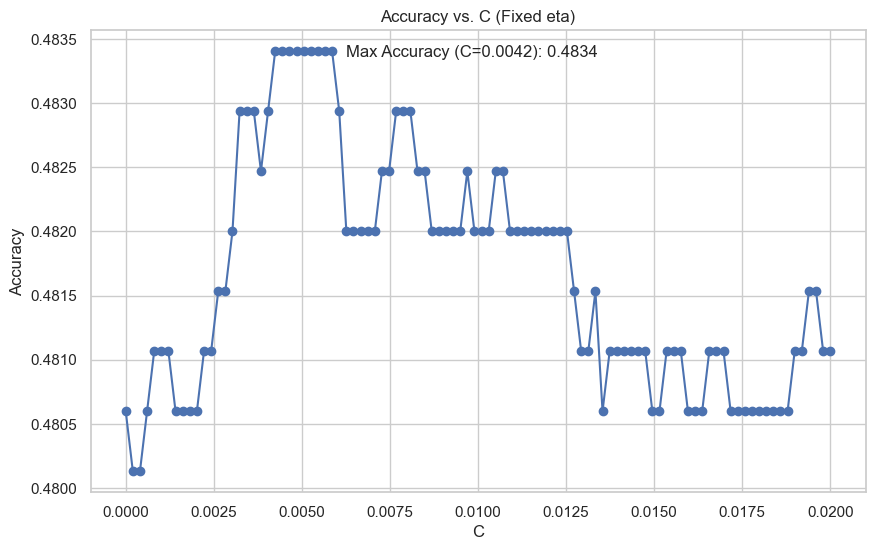

In [66]:
# Define Parameter Grid
Cs = np.linspace(0, 0.02, 100)

# Initialize List To Store Results
accuracies_C_fixed = []

# Vary Eta, Keep C Constant
for C in Cs:
    lr = MultiClassLogisticRegression(eta = 0.1, C = C, solver = 'quasi', penalty = 'l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_C_fixed.append(accuracy)

# Find Value Of C That Maximizes Accuracy
best_C = Cs[np.argmax(accuracies_C_fixed)]
max_accuracy = max(accuracies_C_fixed)

# Plot Line Graph For Varying C With Fixed Eta
plt.figure(figsize = (10, 6))
plt.plot(Cs, accuracies_C_fixed, marker = 'o', linestyle = '-')
plt.title('Accuracy vs. C (Fixed eta)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)

# Add Label For Maximum Point With Arrow Slightly To The Right
plt.annotate(f'Max Accuracy (C={best_C:.4f}): {max_accuracy:.4f}',
             xy=(best_C, max_accuracy),
             xytext=(best_C + 0.002, max_accuracy - 0.00004))
plt.show()

In [81]:
# Initializating Variables
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.5)

def lr_explor(cost):
    
    # Get Object
    lr_clf = MultiClassLogisticRegression(eta = 0.1, iterations = 10, C = float(cost))

    # Initialize Accuracy List
    acc = []

    # Obtain Accuracy For Each Split (C Value)
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X, y)):
        lr_clf.fit(X.iloc[train_indices], y.iloc[train_indices])
        y_hat = lr_clf.predict(X.iloc[test_indices])
        acc.append(mt.accuracy_score(y.iloc[test_indices], y_hat))

    # Print Mean And Standard Deviation
    acc = np.array(acc)
    print(acc.mean(),'+-',2.7*acc.std())

# Create Interactive Widget
wd.interact(lr_explor, cost = list(np.logspace(-4, 1, 15)), __manual = True)

interactive(children=(Dropdown(description='cost', options=(0.0001, 0.00022758459260747887, 0.0005179474679231…

<function __main__.lr_explor(cost)>

In [87]:
%%time

# Initializating Variables
num_cv_iterations = 20
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.5)

def lr_explor(cost):

    # Get Object
    lr_clf = MultiClassLogisticRegression(eta = 0.1, iterations = 10, C = float(cost))

    # Initialize Accuracy List
    acc = []

    # Obtain Accuracy For Each Split (C Value)
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X, y)):
        lr_clf.fit(X.iloc[train_indices], y.iloc[train_indices])
        y_hat = lr_clf.predict(X.iloc[test_indices])
        acc.append(mt.accuracy_score(y.iloc[test_indices], y_hat))
    
    # Return Accuracy
    acc = np.array(acc)
    return acc

# Create Logspace, Obtain Accuracies
costs = np.logspace(-5, 1, 20)
accs = []
for c in costs:
    accs.append(lr_explor(c))

CPU times: total: 4.92 s
Wall time: 1min 31s


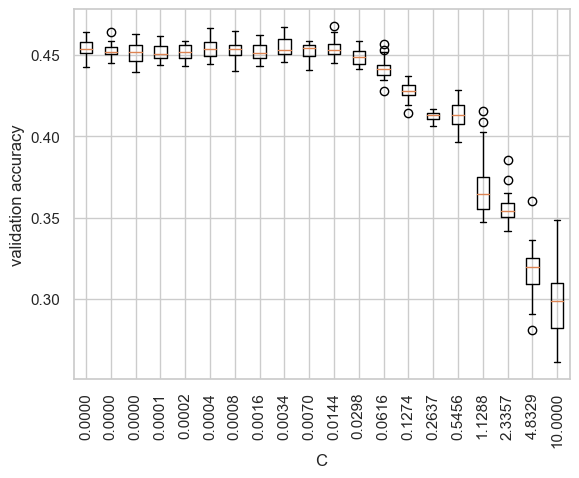

In [89]:
%matplotlib inline

# Show Boxplot Of Data Across C
plt.boxplot(accs)
plt.xticks(range(1, len(costs) + 1), ['%.4f'%(c) for c in costs], rotation = 'vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

When selecting the optimal parameters for our model, there's an inherent risk of "data snooping" or overfitting to the specific dataset in question. Our approach primarily focused on achieving the best accuracy for this dataset, rather than drawing on deeper theoretical insights into why one set of parameters might outperform another.

While this method might raise eyebrows in a purely academic setting, it's not uncommon in real-world applications. Tools like Optuna employ similar strategies, optimizing hyperparameters based on dataset performance. For this exercise, we opted not to use Optuna, partly because integrating our custom class with it would require significant effort. Instead, we felt that manually implementing grid search would provide a valuable hands-on understanding of its mechanics.

We also decided against cross-validation, surmising that the size and diversity of the dataset would render a single train-test split sufficiently representative. This assumption is based on the idea that with sufficiently large datasets, the variance in performance metrics across different splits diminishes.

It's worth noting that we favored the quasi-Newton method over the Newton method for optimization. While the latter might offer marginally better accuracy, the quasi-Newton method's computational efficiency makes it a more practical choice for iterative optimization tasks.

For context, our model's accuracy aligns closely with other models on platforms like [Kaggle](aa[https://www.kaggle.com/code/mauricioasperti/automobile-customer-segmentation-classification]), as observed in this analysis. While achieving parity with other models is encouraging, it's essential to remain vigilant against potential overfitting and always strive for a balance between performance and generalization.

### **3.3: SKLearn Performance Comparisons**

In [72]:
%%time

# Instantiate Object
lr = MultiClassLogisticRegression(eta = 0.1, C = 0.0042, solver = 'quasi', penalty = 'l2')

# Fit Model
lr.fit(X_train, y_train)

# Print Coefficients
print(lr)

# Predict
y_pred = lr.predict(X_test)

# Accuracy
print('Accuracy: %.17f' % accuracy_score(y_test, y_pred))

MultiClass Logistic Regression Object With Coefficients:
[[-1.08332097 -0.0402789   0.04271321 -0.15709043 -0.00890653  0.00890653
  -0.02607213  0.02607213  0.02328122 -0.02328122 -0.00178142  0.05168954
   0.12763916  0.16047768  0.01264483 -0.31072154  0.01997176  0.06842272
  -0.06071195 -0.1523603  -0.00992148  0.14105651]
 [-1.3003573   0.14520036 -0.04114525 -0.02761113  0.00373935 -0.00373935
  -0.05814878  0.05814878 -0.05307046  0.05307046  0.11771485  0.01828648
   0.10206388  0.02886103  0.03761804 -0.22164795  0.02717568 -0.08157258
  -0.04650051  0.01364064  0.04700147 -0.04632458]
 [-1.42512713  0.28859417 -0.06392265  0.19578707  0.05088129 -0.05088129
  -0.0244465   0.0244465  -0.17346022  0.17346022  0.24611258  0.01491172
  -0.15730123 -0.05796222  0.01947317 -0.06836998 -0.05337342 -0.07343436
  -0.03787698  0.19623674  0.06278274 -0.2182168 ]
 [-1.19185397 -0.41197902  0.08544527 -0.03747297 -0.04938569  0.04938569
   0.07421824 -0.07421824  0.14839935 -0.14839935 

In [97]:
%%time

# How Do We Compare To Sklearn?
from sklearn.linear_model import LogisticRegression

# All Parameters Default
lr_sk = LogisticRegression(solver = 'newton-cholesky', n_jobs = 1, multi_class = 'ovr', C = 0.1, penalty = 'l2', max_iter = 50)

# No Need To Add Bias Term, Sklearn Does It Internally
lr_sk.fit(X_train, y_train)
print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-0.06900785  0.04261377 -0.16613942 -0.01000336  0.01000336 -0.03116767
   0.03116767  0.02273768 -0.02273768 -0.00345267  0.05035596  0.13155395
   0.16549434  0.01740796 -0.32846527  0.01861116  0.08524924 -0.06350275
  -0.15385939 -0.01182153  0.14376146]
 [ 0.1639716  -0.03906893 -0.02038133  0.00256269 -0.00256269 -0.05301442
   0.05301442 -0.05268648  0.05268648  0.12311883  0.02187951  0.10714183
   0.03082642  0.03731242 -0.23110465  0.02939161 -0.09018411 -0.04698747
   0.01246944  0.0489688  -0.04673357]
 [ 0.34217032 -0.05370513  0.20718775  0.05215287 -0.05215287 -0.01177414
   0.01177414 -0.17307113  0.17307113  0.25537368  0.01687682 -0.15527039
  -0.06743691  0.01590684 -0.050074   -0.05361915 -0.10484394 -0.03659324
   0.20583078  0.06547379 -0.22860894]
 [-0.54510617  0.07575685 -0.0436861  -0.04927611  0.04927611  0.05337396
  -0.05337396  0.14166015 -0.14166015 -0.39051027 -0.03571349 -0.05387009
  -0.0781772   0.04165031  0.34465194  0.0116066   0.25458879  0.1282

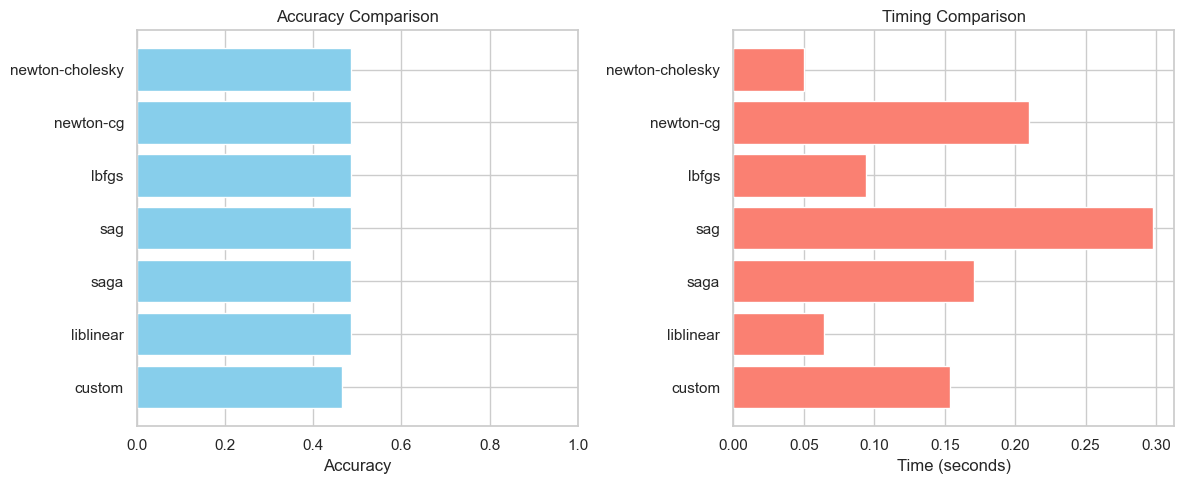

In [106]:
# Import Statements
import time

# Methods To Test
methods = ['liblinear', 'saga', 'sag', 'lbfgs', 'newton-cg', 'newton-cholesky']

# Storage For Results
accuracies = []
timings = []

# Custom Logistic Regression
start_time = time.time()
lr = MultiClassLogisticRegression(eta = 0.1, C = 0.0042, solver = 'steepest', penalty = 'l2')
lr.fit(X_train, y_train)
y_pred_custom = lr.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)
custom_timing = time.time() - start_time

# Append Results
accuracies.append(custom_accuracy)
timings.append(custom_timing)

# Scikit-Learn Logistic Regression Methods
for method in methods:
    start_time = time.time()
    lr_sk = LogisticRegression(solver = method, n_jobs = 1, multi_class = 'ovr', C = 0.1, penalty = 'l2', max_iter = 100)
    lr_sk.fit(X_train, y_train)
    yhat = lr_sk.predict(X_test)
    sk_accuracy = accuracy_score(y_test, yhat)
    sk_timing = time.time() - start_time
    
    # Append Results
    accuracies.append(sk_accuracy)
    timings.append(sk_timing)

# Visualize The Results
methods.insert(0, 'custom')
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.barh(methods, accuracies, color ='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.barh(methods, timings, color='salmon')
plt.xlabel('Time (seconds)')
plt.title('Timing Comparison')
plt.tight_layout()
plt.show()

### **3.4: Deployment - Custom Implementation Vs. SKLearn Implementation**

When integrating machine learning models into real-world applications, especially in mission-critical applications, it's paramount to ensure that they're not only accurate but also efficient. The practicality of a model in a real-time setting can significantly influence its utility. Some factors that affect this are stability, efficiency, maintainability, and scalability.

Our custom logistic regression model achieves an accuracy of 48.3%, while the logistic regression implementations from scikit-learn hover around 48.6%. This marginal difference in performance means that from an accuracy standpoint, both approaches are nearly on par. Interestingly, around half of scikit-learn's methods (namely newton-cholesky, liblinear, and lbfgs) outperformed our custom implementation in terms of speed. This disparity can be attributed to the inherent computational efficiencies of certain optimization techniques. Newton's method, while accurate, can be resource-intensive, whereas the quasi-Newton method we employed balances accuracy with computational efficiency.

Considering the broader picture, we'd advocate for the adoption of scikit-learn's logistic regression for deployment. Here is our rationale:

**Maturity and Stability:** Scikit-learn's logistic regression has undergone extensive testing, both in controlled environments and in the wild. This rigorous evaluation ensures a high degree of stability and reliability, which is paramount for production-level applications.

**Efficiency:** As observed in our evaluations, scikit-learn's implementations, especially certain solvers like 'lbfgs' and 'liblinear', were faster than our custom implementation. Speed can be crucial, especially in real-time applications.

**Maintainability:** Third-party libraries, especially widely-adopted ones like scikit-learn, benefit from a large community of contributors. Regular updates, bug fixes, and compatibility checks with new software versions are almost guaranteed. This active maintenance alleviates concerns about the model becoming obsolete or incompatible over time.

**Scalability:** Scikit-learn's logistic regression, backed by efficient C implementations, can scale well to larger datasets and can be integrated easily into distributed processing pipelines if needed.

**Feature-rich:** Scikit-learn offers a plethora of additional features like built-in cross-validation, integration with other preprocessing steps via pipelines, and more. These can be invaluable in more complex workflows.

**Support and Documentation:** A vast community supports scikit-learn. This means a wealth of tutorials, forums, and documentation is available, which can be instrumental when troubleshooting or seeking to enhance the model further.

**Interoperability:** Scikit-learn seamlessly integrates with other popular Python libraries, ensuring smooth interoperability within a broader data processing and machine learning pipeline.

**Security:** Widely-used libraries often undergo security audits, ensuring that vulnerabilities are identified and patched. This is a critical consideration for deployment in sensitive applications.

**Cost of Switching:** While our custom model offers an educational perspective, switching to a custom implementation in a production environment may come with hidden costs. These can include retraining, validation, and potential disruptions if issues arise.

For our scenario, the model primarily caters to offline analyses. Its role is to segment customers once, following which marketing strategies can be tailored to individual segments. Given the non-real-time nature of this application, the model's speed isn't a primary concern. What's pivotal, however, is its accuracy. And while our current accuracy isn't stellar, we address this in subsequent sections, achieving far more promising results.

### **4: More Exceptional Work - Independent Component Analysis (ICA) To Improve Accuracy**

When looking for exceptional work inspiration, we came across many other projects with the same dataset. Most of these projects achieved a similar accuracy with logistic regression. A logistic regression model may not be the best fit for this dataset. To explore other models that may achieve higher accuracy, we searched for projects with higher accuracies. 

As a result, we found Lucas Bruzzone's project that achieved 99% accuracy using this Customer Segmentation dataset. To achieve 0.99 accuracy with various models, Bruzzone used independent component analysis (ICA) to reduce dimensionality and make relationships clearer.

In [7]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import seaborn as sns
import plotly.express as px

# Point train and test back to the originally read-in CSV data files
train = df_train_csv
test = df_test_csv

In the handle_missing_values() method, Bruzzone originally replaced the NaNs in each column as follows:
- Ever Married: "No"
- Graduated: "No"
- Profession: "Not Specified"
- Work Experience: 0
- Family Size: feature mean
- Var_1: "Unknown"

We disagreed with Bruzzone's processing because we felt that they were not best practice.

We do not need to replace or even consider Var_1, as discussed earlier. Furthermore, a better practice is to replace categorical NaNs with the mode. We agreed that replacing Work Experience NaNs with 0 is reasonable.

In [8]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
# Edited author's code to reflect how we cleaned our data above.
def handle_missing_values(df):
    # Replace NaN in Ever_Married with the mode
    df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)

    # Replace NaN in Graduated with the mode
    df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)

    # Replace NaN in Profession with the mode
    df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

    # Replace NaN in Work_Experience with 0
    df['Work_Experience'].fillna(0, inplace=True)

    # Replace NaN in Family_Size with the mean of valid values
    mean_family_size = round(df['Family_Size'].mean())
    df['Family_Size'].fillna(mean_family_size, inplace=True)

    # Delete ID and Var_1 columns
    del df['Var_1']
    del df['ID']
    
    return df

In [9]:
# Let's use the above function to clean and processing the training data
train = handle_missing_values(train)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A


Bruzzone created a Decomp class to visualize how patterns become easier to recognize when the dimensionality is reduced.

In [10]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF, FastICA
from mpl_toolkits.mplot3d import Axes3D

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        self.mixing_ = None
        
    def dimension_reduction(self, df):
        X_reduced = self.dimension_method(df)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
            self.mixing_ = comp.mixing_  # Store the mixing_ matrix
        else:
            raise ValueError(f"Invalid method name")
        
        
        return X_reduced
    
    def get_mixing_matrix(self):
        if self.method == "ica":
            return self.mixing_
        else:
            raise ValueError("Mixing matrix is only available for ICA dimensionality reduction method.")
    
    
    def scaler(self, df):
        _df = df.copy()
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        if self.n_components == 2:
            # Gráfico 2D
            plt.figure(figsize=(16, 9))
            sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='coolwarm');
            plt.title(f'{label} on {hue}', fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=10)
            plt.xlabel(f"{label} Component 1", fontsize=15)
            plt.ylabel(f"{label} Component 2", fontsize=15)
        elif self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(16, 9))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(tmp[f"{label}_0"], tmp[f"{label}_1"], tmp[f"{label}_2"], c=tmp[hue], cmap='coolwarm', s=100)
            ax.set_xlabel(f"{label} Component 1", fontsize=15)
            ax.set_ylabel(f"{label} Component 2", fontsize=15)
            ax.set_zlabel(f"{label} Component 3", fontsize=15)
            plt.title(f'{label} on {hue} (3D)', fontsize=20)
            fig.colorbar(scatter)
        plt.show()

Bruzzone also included code to encode the categorical values in the dataset.

In [11]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    # Separate numeric and categorical columns, excluding the target column
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    label_encoder_mappings = {}
    le = LabelEncoder()

    # Encode categorical columns
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
        label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return df, label_encoder_mappings

train, label_encoder_mappings = encode_categorical_features(train)

Bruzzone also included code to perform correlation analysis.

In [12]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
def plot_correlation_heatmap(df, target_column):
    # Calculate correlation matrix for numeric columns
    corr = df.corr(numeric_only=True)
    
    # Calculate correlation with the target column
    target_corr = corr[target_column].drop(target_column)
    
    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)
    
    # Select features with correlation values greater than or equal to 0.05 in absolute value
    target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]
    
    # Set the style and palette for the heatmap
    sns.set(font_scale=0.8)
    sns.set_style("white")
    sns.set_palette("PuBuGn_d")
    
    # Create a heatmap with the selected features
    sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {target_column}')
    plt.show()
    
    # Return the DataFrame with the selected features
    return target_corr_filtered.index.tolist()

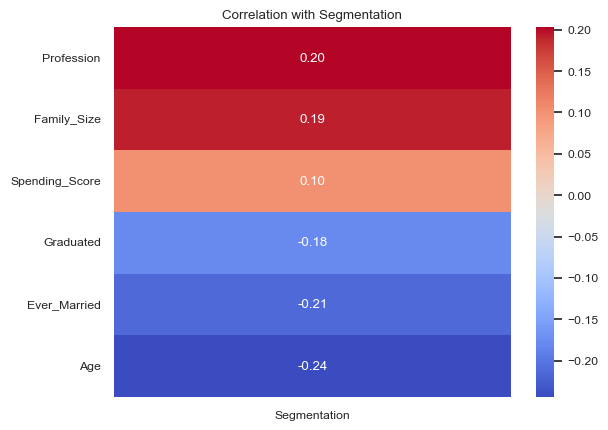

In [13]:
target_corr_filtered = plot_correlation_heatmap(train, 'Segmentation')

From the correlation analysis above, we note that "Profession" is positively correlated of 0.20 with "Segmentation", telling us that a customer's profession influences their segmentation. "Family_Size" and "Spending_Score" are also positively correlated with "Segmentation". This might be because the three categories are related, those with professions with a higher salary may have a higher spending score, and often can support larger families. 

We also see that "Graduated", "Ever_Married", and "Age" are negatively correlated with Segmentation. The 6 features above can be important when developing targeted marketing strategies for the various customer segments and provide insight to customer behavior.

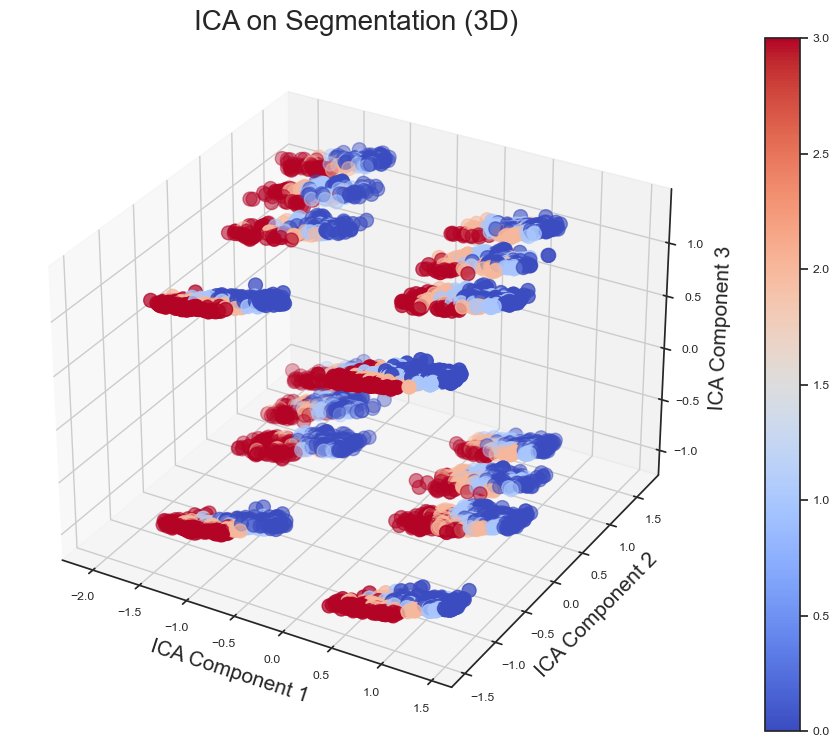

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 3D scatterplot to explore the distribution of data points
# in a reduced three-dimensional space obtained through ICA
data = train.copy()
method = 'ica'

# Plot based on the original training dataset
decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')

del data

The 3D scatterplot gives us insight into how well the ICA method separates the data points based on the "Segmentation" variable. We can determine the effectiveness of the dimensional analysis reduction and clustering by looking at how well data points with the same "Segmentation" value cluster together in the 3D space. They seem relatively well clustered based on their similar colors, but the clusters are not well separated between each other. 

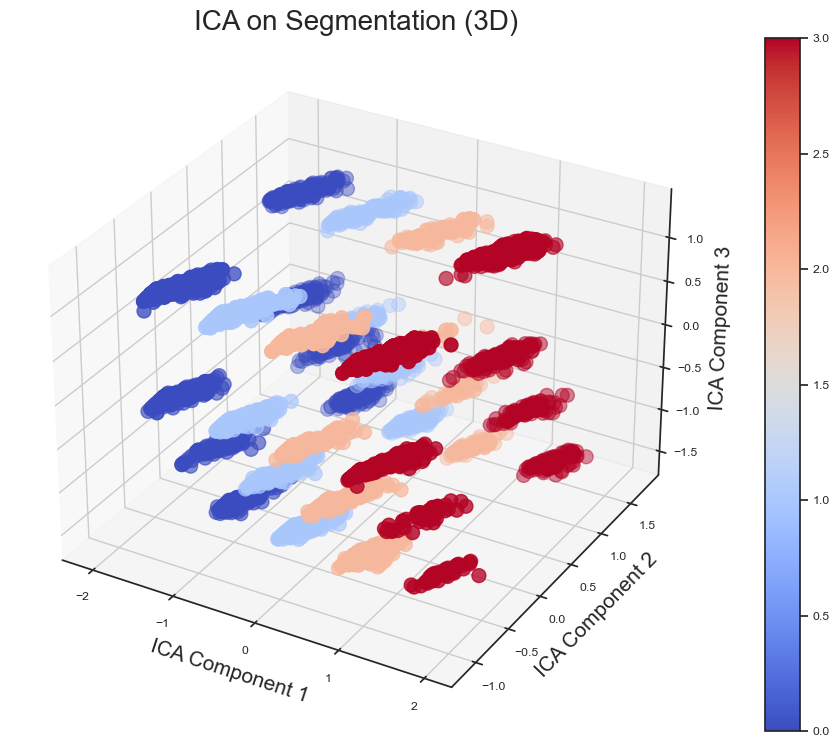

In [15]:
train_filtered = train[target_corr_filtered + ['Segmentation']]

data = train_filtered.copy()
method = 'ica'

# Plot based on the filtered training dataset
decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')   
del data

In the 2nd 3D scatterplot, we see much more cluster separation. That indicates that the the relationships are clearer between segmentation groups. Well-separated data such as this can improve a model's accuracy because the patterns are easier to discern. 

In [16]:
train_ica = decomp_feature.copy()

Now we can apply the same cleaning and processing methods to the test data before feeding it to models. We expect the result to be highly accurate, thanks to dimensionality reduction and separating clusters in a more predicatble way. 

In [17]:
# Handle missing values in the test data
test = handle_missing_values(test)

# Encode categorical features in the test data and store label encoding mappings
test, label_encoder_mappings = encode_categorical_features(test)

# Select only the relevant features (including target 'Segmentation') based on correlation
test_filtered = test[target_corr_filtered + ['Segmentation']]

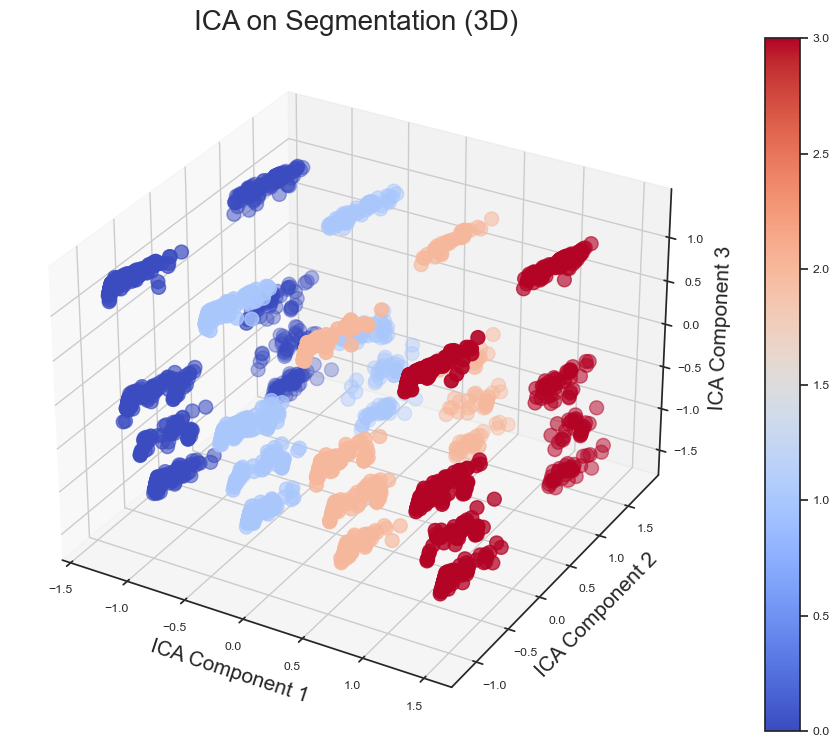

In [18]:
# Perform dimensionality reduction on the test data
data = test_filtered.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([test_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')

del data

Once cleaning and processed, we can see that the test data points are well separated. We expect these well separated clusters to allow models to be more accurate when predicting a customer's segmentation.

In [19]:
test_ica = decomp_feature.copy()

Bruzzone created a method to train and test 4 models with the same data to compare their accuracy. He uses Random Forest, C5, HistGradientBoostingClassifier, and K-Nearest Neighbors algorithms to predict the "Segmentation" target variable.

In [47]:
def train_and_evaluate_models_train_test(train_df, test_df, target_col, df_name):
    # Separate features and the target column for training and test sets
    X_train = train_df.drop(target_col, axis=1).values
    y_train = train_df[target_col].values
    X_test = test_df.drop(target_col, axis=1).values
    y_test = test_df[target_col].values
    
    # Initialize a list to store the trained models and their accuracies
    trained_models = []

    # Our Custom Model
    lr = MultiClassLogisticRegression(eta = 0.1, C = 0.00001, solver = 'quasi', penalty = 'l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{df_name} - Custom Logistic Regression Accuracy: {accuracy:.2f}")
    trained_models.append(("Custom Logistic Regression", lr, accuracy))

    # Liblinear
    lr_liblinear = LogisticRegression(solver = 'liblinear', n_jobs = 1, multi_class = 'ovr', C = 0.1, penalty = 'l2', max_iter = 100)
    lr_liblinear.fit(X_train, y_train)
    y_pred = lr_liblinear.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{df_name} - Liblinear Accuracy: {accuracy:.2f}")
    trained_models.append(("Liblinear", lr_liblinear, accuracy))

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")
    trained_models.append(("Random Forest", random_forest_model, random_forest_accuracy))

    # C5 (Decision Tree)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")
    trained_models.append(("C5", c5_model, c5_accuracy))

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")
    trained_models.append(("HistGradientBoostingClassifier", hist_gradient_boosting_model, hist_gradient_boosting_accuracy))

    # KNN (K-Nearest Neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    print(f"{df_name} - KNN Accuracy: {knn_accuracy:.2f}")
    trained_models.append(("KNN", knn_model, knn_accuracy))

    return trained_models

In [48]:
# Assuming you have 'train' as the training dataset and 'test' as the test dataset
trained_models = train_and_evaluate_models_train_test(train_ica, test_ica, 'Segmentation', "Train data vs Test data")

Train data vs Test data - Custom Logistic Regression Accuracy: 0.91
Train data vs Test data - Liblinear Accuracy: 0.91
Train data vs Test data - Random Forest Accuracy: 1.00
Train data vs Test data - C5 Accuracy: 0.96
Train data vs Test data - HistGradientBoostingClassifier Accuracy: 0.99
Train data vs Test data - KNN Accuracy: 0.94


The final result of the model evaluation on the test data is quite impressive. The models have accuracies ranging between 0.94 to 1. The models and preprocessing data with ICA drastically improved the model accuracies. 